# Basic Statistics Review – Linear Regression

Script for the 1-Introduction-to-R---Reviewing-Basic-Statistics.pdf

### Example 1 - Mauna Loa Atmospheric CO2 Concentration

In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
cols = ["year", "month", "--", "--", "CO2", "seasonaly_adjusted", "fit",
        "seasonally_adjusted_fit", "CO2_filled", "seasonally_adjusted_filled"]

co2 = pd.read_csv(pm.get_data("monthly_in_situ_co2_mlo.csv"), header=56, names=cols)

co2 = co2[['year', 'month', 'CO2']]

print(co2.shape)

co2.head()

(720, 3)


,year,month,CO2
0,1958,1,-99.99
1,1958,2,-99.99
2,1958,3,315.69
3,1958,4,317.46
4,1958,5,317.50


In [3]:
#remove -99.00 CO2 data

idx_to_remove = co2[co2.CO2 == -99.99].index

co2 = co2.drop(idx_to_remove)

co2.shape

(707, 3)

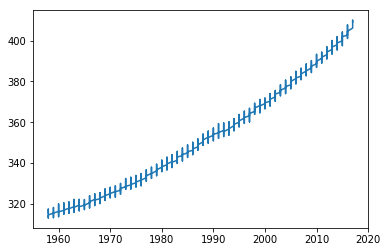

In [4]:
plt.plot(co2.year, co2.CO2)

plt.show()

In [5]:
# calculate the slope and intercept values “by hand” 

SSxx = sum((co2.year - stat.mean(co2.year)) * (co2.year - stat.mean(co2.year)))
print(SSxx)
SSxy = sum( (co2.CO2 - stat.mean(co2.CO2) ) * (co2.year - stat.mean(co2.year) ) )
print(SSxy)

print()
slope = (SSxy / SSxx )
print('Slope: {}'.format(slope))
intercept = stat.mean(co2.CO2) - slope*stat.mean(co2.year) 
print('Intercept: {}'.format(intercept))

205580.56294200846
315920.91148514836

Slope: 1.5367255880813278
Intercept: -2701.5724490899456


In [6]:
# compute the residuals by hand

co2_fitted_values = slope*co2.year + intercept
co2_residuals = co2.CO2 - co2_fitted_values

print(co2_fitted_values, co2_residuals)

2      307.336252
3      307.336252
4      307.336252
6      307.336252
7      307.336252
8      307.336252
10     307.336252
11     307.336252
12     308.872978
13     308.872978
14     308.872978
15     308.872978
16     308.872978
17     308.872978
18     308.872978
19     308.872978
20     308.872978
21     308.872978
22     308.872978
23     308.872978
24     310.409704
25     310.409704
26     310.409704
27     310.409704
28     310.409704
29     310.409704
30     310.409704
31     310.409704
32     310.409704
33     310.409704
          ...    
684    394.929611
685    394.929611
686    394.929611
687    394.929611
688    394.929611
689    394.929611
690    394.929611
691    394.929611
692    394.929611
693    394.929611
694    394.929611
695    394.929611
696    396.466336
697    396.466336
698    396.466336
699    396.466336
700    396.466336
701    396.466336
702    396.466336
703    396.466336
704    396.466336
705    396.466336
706    396.466336
707    396.466336
708    398

In [7]:
# Using sklearn- Linear Regression

from sklearn.linear_model import LinearRegression

#X = co2[['year', 'month']].values
X = co2.year.values.reshape(-1, 1)
y = co2.CO2.values

reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)

print('Score: {}'.format(reg.score(X, y)))

print('Coef: {}'.format(reg.coef_))

print('Intercept: {}'.format(reg.intercept_))



Score: 0.9786600799633813
Coef: [1.53672559]
Intercept: -2701.5724490899447


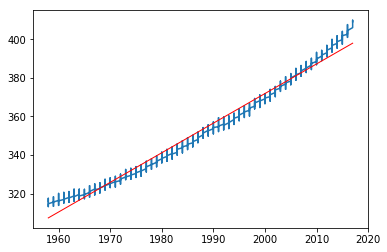

In [8]:
plt.plot(co2.year, co2.CO2)

plt.plot(X, y_pred, color='red', linewidth=1)

plt.show()

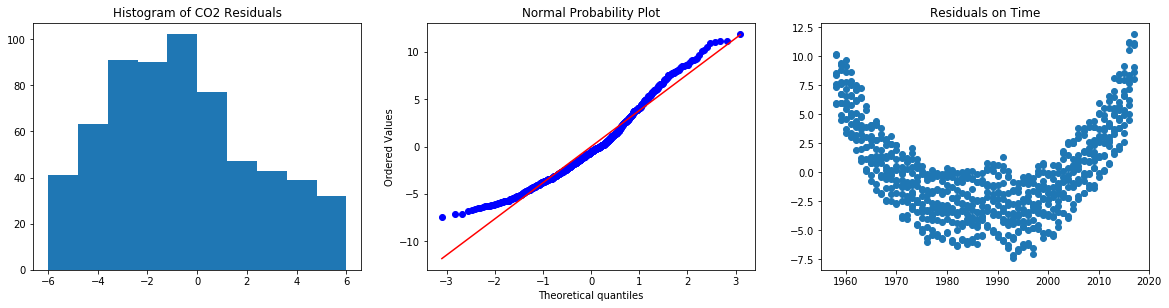

In [9]:
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1=plt.subplot(231)
ax1.hist(co2_residuals, range=(-6, 6), )
#ax1.set_xlim([-6, 6])
#ax1.set_ylim([0 ,70])
ax1.set_title('Histogram of CO2 Residuals')

ax2=plt.subplot(232)
stats.probplot(co2_residuals, plot=plt)
ax2.set_title('Normal Probability Plot')
#ax2.set_ylim([-6 ,6])
#ax2.set_xlim([-3 ,3])

ax3=plt.subplot(233)
ax3.scatter(co2.year, co2_residuals)
ax3.set_title('Residuals on Time')
#plt.gca().set_ylim([-6 ,6])
#ax2.set_xlim([-3 ,3])

plt.show()

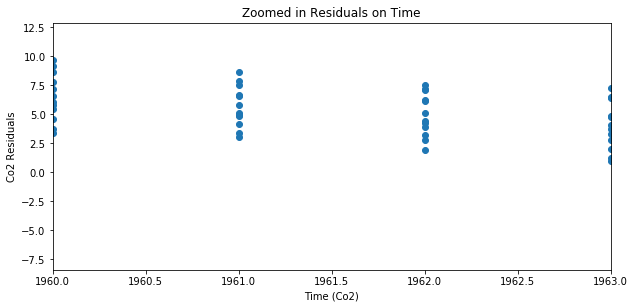

In [10]:
# zoom in on the residuals to see the seasonality in the data set.

rcParams['figure.figsize'] = 10, 10

ax=plt.subplot(211)
ax.scatter(co2.year, co2_residuals)
ax.set_xlim([1960, 1963])
#ax.set_ylim([-6 ,6])
ax.set_title('Zoomed in Residuals on Time')
ax.set_ylabel('Co2 Residuals')
ax.set_xlabel('Time (Co2)')

plt.show()

# Here the plot was not exactly what I expected, in the PDF the plot is quite different

### Example 2 - Sleep

A very famous data set was discussed in William Gossett’s (he’s better known as “Student”)
classic paper The Probable Error of a Mean (Student, 1908). Gossett describes an experiment in
which two sleeping aides are administered during the course of a clinical trial to a group of 10
research subjects. The average number of hours of sleep gained (called by the variable name
“extra”) under the use of each of the two drugs (indicated by the variable name “group”) are
recorded. 

Recorded for us is the extra sleep obtained as a consequence of taking the drug (“extra”), a label
telling us which drug was taken (“group”), and a label for which of the 10 people we are talking
about (“ID”).

In [11]:
sleep = pd.read_csv('sleep.csv')
sleep = sleep[['extra','group','ID']]

print(sleep.shape)

sleep.head()

(20, 3)


,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


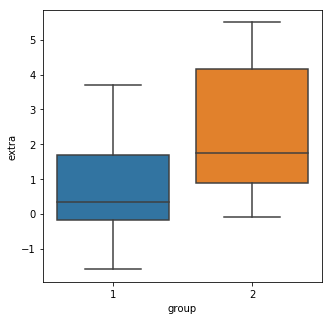

In [12]:
import seaborn as sns

rcParams['figure.figsize'] = 5, 5

ax = sns.boxplot(x="group", y="extra", data=sleep)

apparently the median seems to be higher in the second group

In [13]:
import statsmodels.stats.api as sms

extra1 = sleep[sleep.group == 1].extra.values

extra2 = sleep[sleep.group == 2].extra.values

# t-test
# two dependent samples
stats.ttest_rel(extra1, extra2)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

We have a fairly hefty t value (if that were a z value from a normal distribution, it would be quite quite large)
How large it is with a T distribution, dependeds on your sample size.

The p value we obtain is less than the standard nickel. Less than point zero five. 
It's even less than point zero one. These data are highly significant. 
So we are going to go with the Alternative hypothesis that the there is a difference between the two drugs.

QQ slope: 1.196319785403006
QQ intercept: -1.58
QQ r: 0.8923046529182111


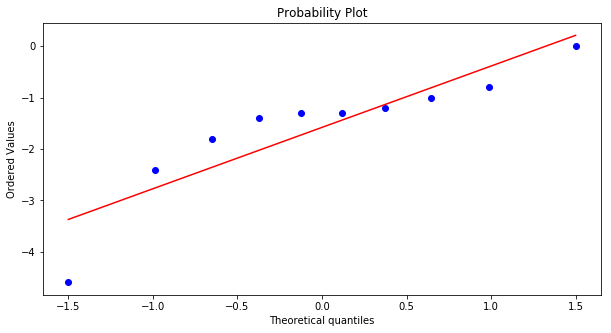

In [14]:
diffs = extra1-extra2

rcParams['figure.figsize'] = 10, 5

probplt = stats.probplot(diffs, plot=plt, dist="norm")
qq_slope, qq_intercept, qq_r = probplt[1]
ax.set_title('Normal Probability Plot')
ax.set_ylim(-4, 0)
ax.set_xlim(-1.5, 1.5)

print('QQ slope:', qq_slope)
print('QQ intercept:', qq_intercept)
print('QQ r:', qq_r)

plt.show()

# A Regression Model

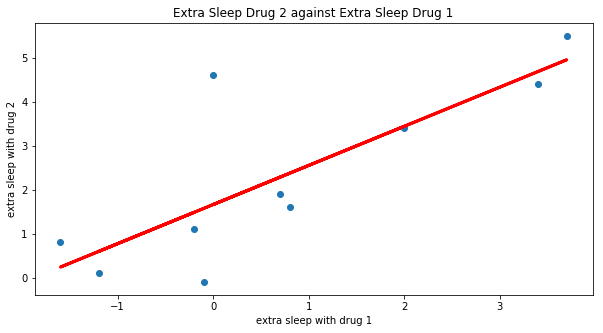

In [15]:
# from sklearn.linear_model import LinearRegression
plt.scatter(extra1, extra2)

sleep_linear_model = LinearRegression().fit(extra1.reshape(-1, 1),
                                            extra2.reshape(-1, 1))
sleep_linear_model_y_pred = sleep_linear_model.predict(extra1.reshape(-1, 1))

plt.plot(extra1, sleep_linear_model_y_pred, color='red', linewidth=3)
plt.title('Extra Sleep Drug 2 against Extra Sleep Drug 1')
plt.ylabel('extra sleep with drug 2')
plt.xlabel('extra sleep with drug 1')
plt.show()

In [16]:
print('Estimate a slope and an intercept:')
print('Slope:', sleep_linear_model.coef_ )
print('Intercept:', sleep_linear_model.intercept_)

Estimate a slope and an intercept:
Slope: [[0.88994966]]
Intercept: [1.66253775]


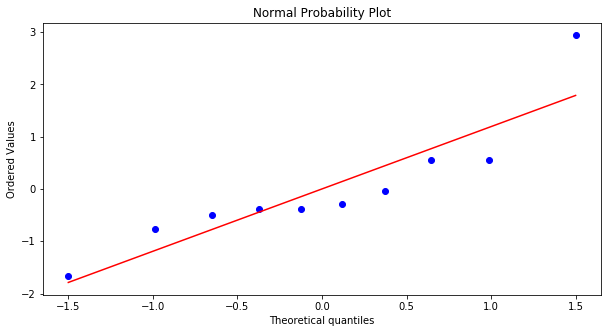

In [17]:
# QQ Plot

residuals = extra2.reshape(-1, 1) - sleep_linear_model_y_pred

probplt = stats.probplot(residuals.reshape(-1), plot=plt, dist="norm")
#qq_slope, qq_intercept, qq_r = probplt[1]
plt.title('Normal Probability Plot')
#plt.ylim(-1, 3)
#plt.xlim(-1.5, 1.5)

#print('QQ slope:', qq_slope)
#print('QQ intercept:', qq_intercept)
#print('QQ r:', qq_r)

plt.show()


In [18]:
# Statsmodels gives R-like statistical output
from statsmodels.api import OLS

OLS(extra2.reshape(-1, 1),
    extra1.reshape(-1, 1)).fit().summary()

C:\Users\Jessica\Anaconda3\envs\Time_Series_Analysis-Cousera\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     13.35
Date:                Wed, 06 Feb 2019   Prob (F-statistic):            0.00529
Time:                        23:08:02   Log-Likelihood:                -20.648
No. Observations:                  10   AIC:                             43.30
Df Residuals:                       9   BIC:                             43.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2521      0.343      3.654      0.005       0.477       2.027
==============================================================================
Omnibus:                        8.413   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                3.570
Skew:                           1.374   Prob(JB):                        0.168
Kurtosis:                       4.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our Model is the:

extra2 = 0.8899 x extra1 x 1.6625

## Questions:

1. What do you predict for sleep gained with drug 2 if you know the sleep gained with drug 1 is 2 hours?

In [19]:
0.8899*2+1.6625

3.4423000000000004

2. What is the residual associated with the 3rd data point?

In [20]:
extra2[2] - (0.8899*extra1[2]+1.6625)

-0.38452